## Metody Nieparametryczne w Statystyce
# Zadanie 3
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń hipotezy głównej w teście MannaWhitneya i w teście równości dwóch wartości oczekiwanych (funkcja t.test) w przypadku, gdy jedne dane pochodzą z rozkładu normalnego, a drugie np. z rozkładu 𝜒2 (który nie jest rozkładem symetrycznym).
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [4]:
import numpy as np, pandas as pd
from scipy.stats import norm, mannwhitneyu, ttest_ind, chi2
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn import preprocessing

2. Badanie odsetków odrzuceń prawdziwej hipotezy głównej dla obydwu testów. Jeden z wektorów liczbowych pochodzi z rozkładu normalnego, a drugi z rozkładu chi kwadrat.

Test t-Studenta polega na obliczeniu statystyki t na podstawie różnicy pomiędzy średnimi próbek, ich liczebności oraz odchylenia standardowego i obliczeniu p-value.

Test Manna-Whitneya opiera się na porównywaniu sumy rang jednej próbki z sumą rang drugiej próbki w celu stwierdzenia, czy istnieje statystycznie istotna różnica między medianami tych grup.

H0: wartości oczekiwane są sobie równe

H1: wartości oczekiwane są różne

Zliczam przypadki, w których hipoteza zerowa zostaje odrzucona.

Test  t-studenta


100%|██████████| 140/140 [08:12<00:00,  3.52s/it]


Test  Manna-Whitneya


100%|██████████| 140/140 [17:37<00:00,  7.55s/it]


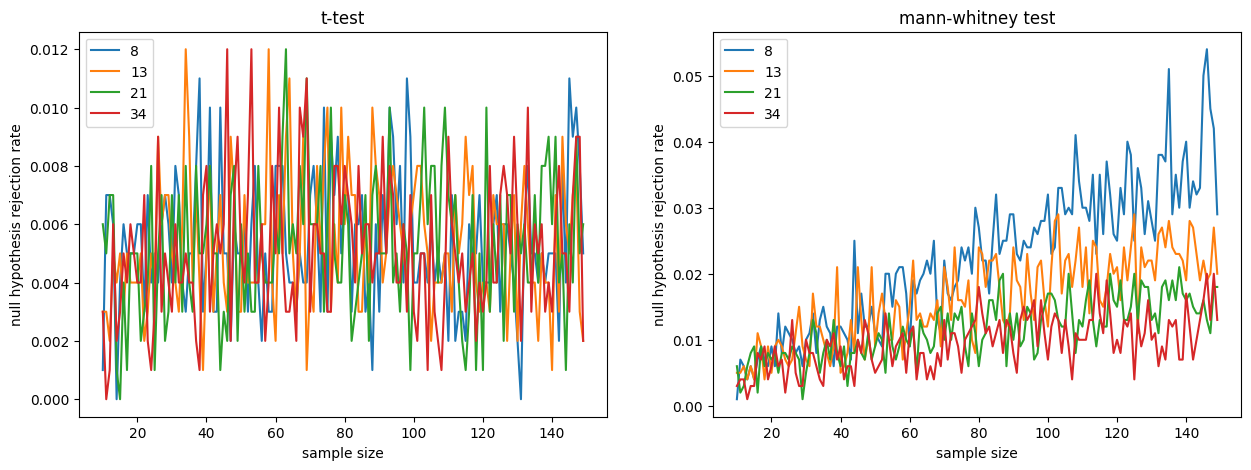

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for k in range(0, 2):    
    results = pd.DataFrame(columns=["8", "13", "21", "34"])
    buf = []
    print("Test ", "t-studenta" if k == 0 else "Manna-Whitneya")
    for n in tqdm(range (10, 150)):
        for i in range (0, 1000):
            for df in [8, 13, 21, 34]:
                #generowanie dwóch wektorów liczbowych z rozkładu normalnego
                x1 = norm.rvs(size=n, loc=0 , scale=1)
                x2 = preprocessing.scale(chi2.rvs(size=n, df=df))
                
                #testy na równość wartości oczekiwanej
                if k == 0:
                    buf.append(ttest_ind(x1, x2)[1] < .05)
                else:
                    buf.append(mannwhitneyu(x1, x2)[1] < .05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(title="t-test" if k == 0 else "mann-whitney test", ax = axes[k],
                xlabel="sample size", ylabel="null hypothesis rejection rate")

Dane pochodzą z różnych rozkładów, ale ich wartość oczekiwana jest równa.Odsetek odrzuceń hipotezy zerowej powinien być więc jak najmniejszy. W tym przypadku lepiej sprawdza się test t-Studenta, dla którego niezależnie od liczby obserwacji w próbce odsetek odrzuceń oscyluje w okolicach 0.007. Dla testu manna-whitneya odsetek rośnie wraz z liczbą obserwacji i wyprzedza znacząco ten obliczony dla testu klasycznego.